In [1]:
library(tidyverse)
library(rvest)
library(dplyr)
library(stringr)
library(digest)
library(repr)
library(infer)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.3     ✔ purrr   0.3.4
✔ tibble  3.0.6     ✔ dplyr   1.0.4
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Loading required package: xml2


Attaching package: ‘rvest’


The following object is masked from ‘package:purrr’:

    pluck


The following object is masked from ‘package:readr’:

    guess_encoding




In [2]:
# Reading Data
id <- "1InFZlQaj3VzFHzhh5j8WJyDf4HmcD__-" # google file ID
vpd_crime_data <- read.csv(sprintf("https://docs.google.com/uc?id=%s&export=download", id))
vpd_crime_data <- na.omit(vpd_crime_data)
head(vpd_crime_data)

,TYPE,YEAR,MONTH,DAY,HOUR,MINUTE,HUNDRED_BLOCK,NEIGHBOURHOOD,X,Y
,<chr>,<int>,<int>,<int>,<int>,<int>,<chr>,<chr>,<dbl>,<dbl>
1,Theft of Vehicle,2020,4,19,21,30,29XX SLOCAN ST,Renfrew-Collingwood,496397.5,5456123
2,Theft of Vehicle,2020,2,21,1,43,29XX VENABLES ST,Hastings-Sunrise,496801.2,5458182
3,Theft of Vehicle,2020,2,11,1,30,29XX VIRTUAL WAY,Renfrew-Collingwood,497011.9,5456474
4,Theft of Vehicle,2020,5,16,22,0,29XX W 10TH AVE,Kitsilano,487613.2,5456729
5,Theft of Vehicle,2020,1,1,12,0,29XX WOODLAND DR,Kensington-Cedar Cottage,494641.9,5456214
6,Theft of Vehicle,2020,11,22,0,37,2X E CORDOVA ST,Central Business District,492453.1,5458847


In [3]:
str(vpd_crime_data)

'data.frame':	37491 obs. of  10 variables:
 $ TYPE         : chr  "Theft of Vehicle" "Theft of Vehicle" "Theft of Vehicle" "Theft of Vehicle" ...
 $ YEAR         : int  2020 2020 2020 2020 2020 2020 2020 2020 2020 2020 ...
 $ MONTH        : int  4 2 2 5 1 11 8 12 1 4 ...
 $ DAY          : int  19 21 11 16 1 22 17 24 1 8 ...
 $ HOUR         : int  21 1 1 22 12 0 21 23 0 21 ...
 $ MINUTE       : int  30 43 30 0 0 37 0 30 0 0 ...
 $ HUNDRED_BLOCK: chr  "29XX SLOCAN ST" "29XX VENABLES ST" "29XX VIRTUAL WAY" "29XX W 10TH AVE" ...
 $ NEIGHBOURHOOD: chr  "Renfrew-Collingwood" "Hastings-Sunrise" "Renfrew-Collingwood" "Kitsilano" ...
 $ X            : num  496397 496801 497012 487613 494642 ...
 $ Y            : num  5456123 5458182 5456474 5456729 5456214 ...
 - attr(*, "na.action")= 'omit' Named int 1081
  ..- attr(*, "names")= chr "1081"


In [4]:
summary(vpd_crime_data)

     TYPE                YEAR          MONTH             DAY       
 Length:37491       Min.   :2020   Min.   : 1.000   Min.   : 1.00  
 Class :character   1st Qu.:2020   1st Qu.: 3.000   1st Qu.: 8.00  
 Mode  :character   Median :2020   Median : 6.000   Median :15.00  
                    Mean   :2020   Mean   : 6.175   Mean   :15.16  
                    3rd Qu.:2020   3rd Qu.: 9.000   3rd Qu.:23.00  
                    Max.   :2020   Max.   :12.000   Max.   :31.00  
      HOUR           MINUTE      HUNDRED_BLOCK      NEIGHBOURHOOD     
 Min.   : 0.00   Min.   : 0.00   Length:37491       Length:37491      
 1st Qu.: 4.00   1st Qu.: 0.00   Class :character   Class :character  
 Median :13.00   Median : 8.00   Mode  :character   Mode  :character  
 Mean   :11.46   Mean   :16.48                                        
 3rd Qu.:18.00   3rd Qu.:30.00                                        
 Max.   :23.00   Max.   :59.00                                        
       X                Y  

In [5]:
# Tidying Data
neighbourhoods <- c("Arbutus Ridge", "Fairview", "Kerrisdale", "Kitsilano", "West Point Grey") # Near UBC neighbourhoods

vpd_crime_data <- vpd_crime_data %>% 
    select(TYPE, MONTH, DAY, NEIGHBOURHOOD) %>%
    filter(NEIGHBOURHOOD %in% neighbourhoods)

head(vpd_crime_data)

,TYPE,MONTH,DAY,NEIGHBOURHOOD
,<chr>,<int>,<int>,<chr>
1,Theft of Vehicle,5,16,Kitsilano
2,Theft of Vehicle,2,22,Kitsilano
3,Theft of Vehicle,12,24,Kitsilano
4,Theft of Vehicle,7,27,Kitsilano
5,Theft of Vehicle,1,16,Fairview
6,Theft of Vehicle,3,21,Fairview


In [6]:
# Number of crimes by months
crimes_by_months <- vpd_crime_data %>%
    group_by(MONTH) %>%
    dplyr::summarise(count_crimes = n())

first_term_months <- c(9, 10, 11, 12)
second_term_months <- c(1, 2, 3, 4)

terms <- c("First Term", "Second term")

# Counting the number of crimes for both terms separately
crimes_for_term_one <- crimes_by_months %>%
    filter(MONTH %in% first_term_months) %>%
    summarize(count_crimes = sum(count_crimes))

crimes_for_term_two <- crimes_by_months %>%
    filter(MONTH %in% second_term_months) %>%
    summarize(count_crimes = sum(count_crimes))

# Binding all four data frames into one data frame to get the number of crimes in both terms
crimes_by_term <- rbind(crimes_for_term_one, crimes_for_term_two) %>%
    cbind(terms) 

# Renaming new column to terms' column
names(crimes_by_term)[names(crimes_by_term) == "count_crimes"] <- "num_of_crimes"
crimes_by_term

num_of_crimes,terms
<int>,<chr>
1669,First Term
1914,Second term


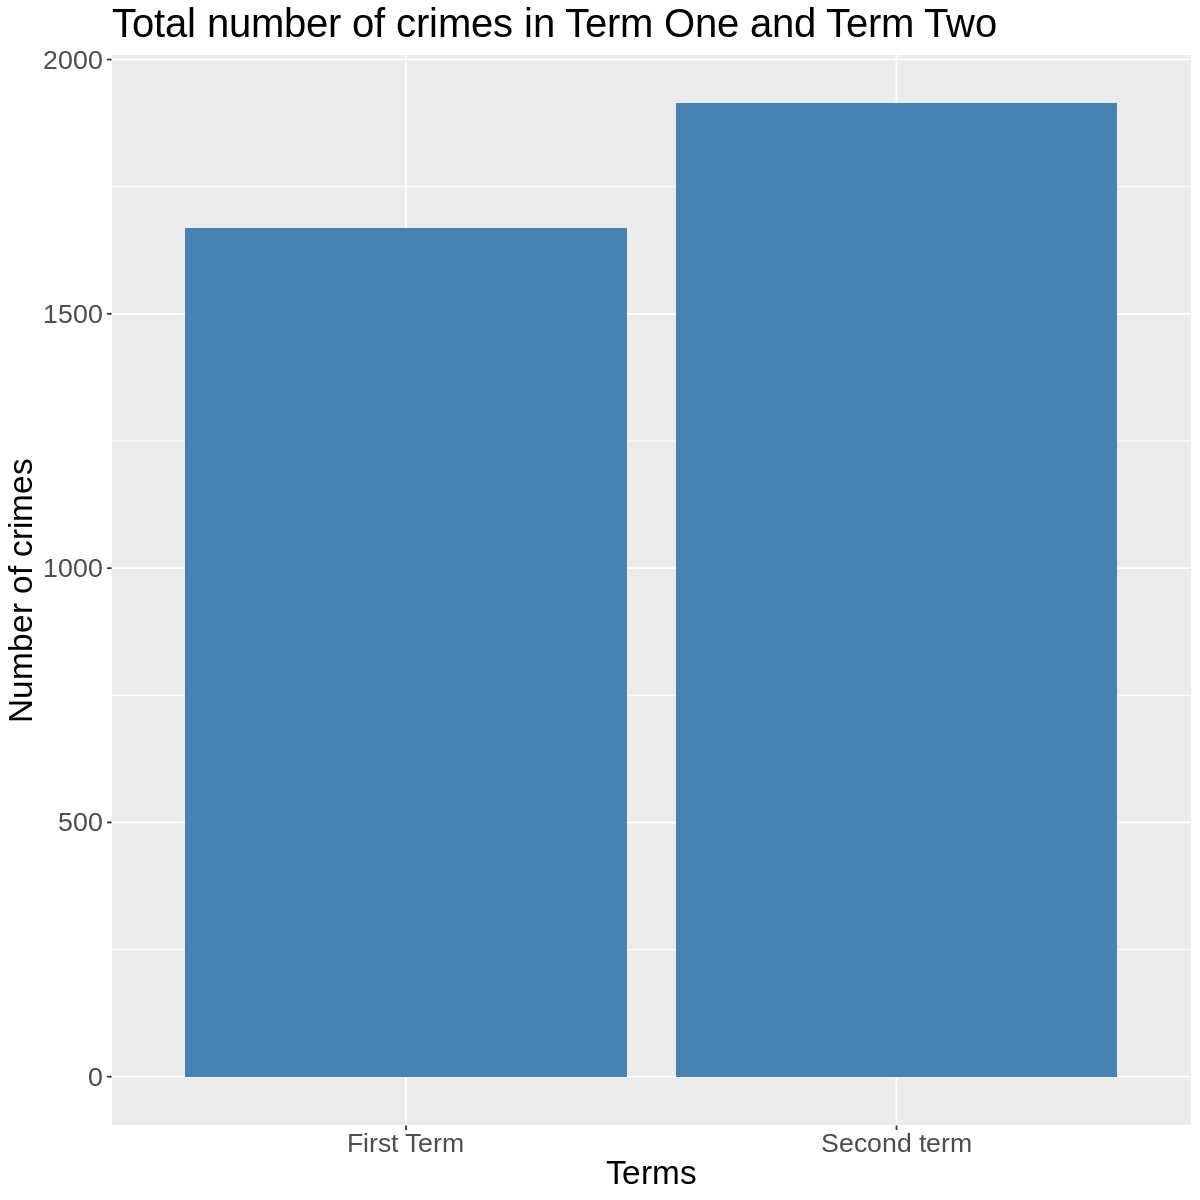

In [7]:
# Bar plot for total number of crimes in both terms
options(repr.plot.width = 10, repr.plot.height = 10)

crimes_by_term_plot <- crimes_by_term %>%
    ggplot(aes(x = terms, num_of_crimes,
               y = num_of_crimes)) +
    geom_bar(stat = "identity", fill = "steelblue") +
    labs(x = "Terms", y = "Number of crimes") +
    ggtitle("Total number of crimes in Term One and Term Two") +
    theme(text = element_text(size = 20))
crimes_by_term_plot

### Finding the rate (# of crimes in  each day/total # of crimes in each term)

In [8]:
# Adding rate column of crimes for each month in both terms

# Number of crimes in each day
crimes_in_day<- vpd_crime_data %>%
    group_by(DAY, MONTH) %>%
    dplyr::summarise(count_crimes = n())
crimes_in_day <- as.data.frame(crimes_in_day)

crimes_rate_term_1 <- crimes_in_day %>%
    filter(MONTH %in% first_term_months) %>%
    mutate(total_num = 1669)

crimes_rate_term_2 <- crimes_in_day %>%
    filter(MONTH %in% second_term_months) %>%
    mutate(total_num = 1914)

crimes_rate <- rbind(crimes_rate_term_1, crimes_rate_term_2) %>%
    mutate(rate = count_crimes/total_num)
head(crimes_rate)

`summarise()` has grouped output by 'DAY'. You can override using the `.groups` argument.



,DAY,MONTH,count_crimes,total_num,rate
,<int>,<int>,<int>,<dbl>,<dbl>
1,1,9,17,1669,0.010185740
2,1,10,22,1669,0.013181546
3,1,11,13,1669,0.007789095
4,1,12,17,1669,0.010185740
5,2,9,15,1669,0.008987418
6,2,10,16,1669,0.009586579


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



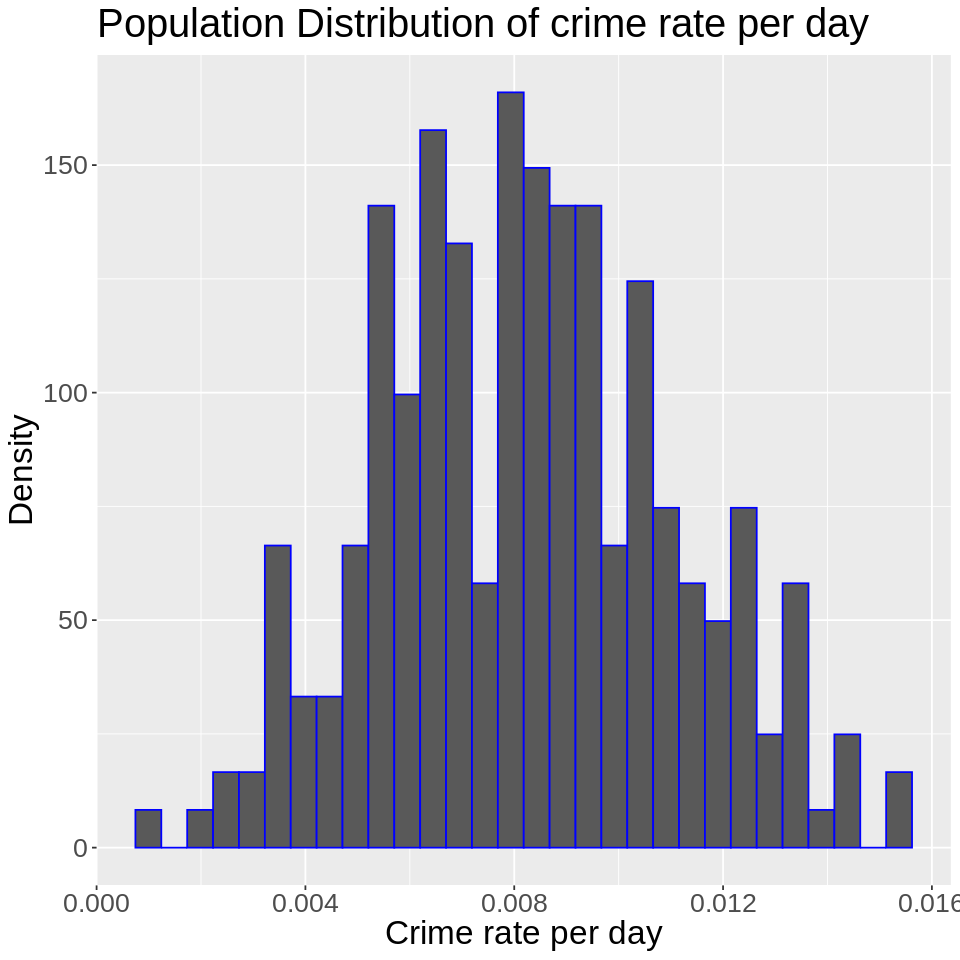

In [14]:
# Population plot
options(repr.plot.width = 8, repr.plot.height = 8)

plot_crimes_rate <- crimes_rate %>%
    ggplot() +
    geom_histogram(aes(x = rate, y = ..density..), color = "blue") +
    theme(text = element_text(size = 20)) +
    xlab("Crime rate per day") +
    ylab("Density") + 
    ggtitle("Population Distribution of crime rate per day")
plot_crimes_rate

### Hypotheses:

H<sub> 0 </sub> : there is no difference in the mean of rate of number of crimes per day in term 1 and 2

H<sub> A </sub> :  there is a difference in the mean of rate of number of crimes per day in term 1 and 2

### Asymptotic

In [67]:
# Finidng the mean and sd for the rate of crimes for both terms together
pop_mu <- mean(crimes_rate$rate)
pop_sd <- sd(crimes_rate$rate)
pop_mu
pop_sd

# Finidng the mean and sd for the rate of crimes for Term One
crimes_rate_term_1 <- crimes_rate %>%
    filter(total_num == "1669")

pop_mu_term_1 <- mean(crimes_rate_term_1$rate)
pop_mu_term_1

pop_sd_term_1 <- sd(crimes_rate_term_1$rate)
pop_sd_term_1


# Finidng the mean and sd for the rate of crimes for Term Two
crimes_rate_term_2 <- crimes_rate %>%
    filter(total_num == "1914")

pop_mu_term_2 <- mean(crimes_rate_term_2$rate)
pop_mu_term_2

pop_sd_term_2 <- sd(crimes_rate_term_2$rate)
pop_sd_term_2

[1] 0.008230453

[1] 0.002813334

[1] 0.008196721

[1] 0.003045667

[1] 0.008264463

[1] 0.002570193

In [150]:
# # Sample of size 80
# set.seed(40)
# sample_80 <- crimes_rate %>%
#     ungroup() %>%
#     rep_sample_n(size = 80, reps = 500, replace = FALSE) %>%
#     group_by(replicate) %>%
#     summarize(sample_mean = mean(rate))

# head(sample_80)

In [149]:
# # Approximating the sampling distribution
# sample_mu <- mean(sample_80$sample_mean)
# sample_sd <- sd(sample_80$sample_mean)

# data_normal <- tibble(sample_mean = seq(min(sample_80$sample_mean),
#                                         max(sample_80$sample_mean), 0.01),
#                       density = dnorm(sample_mean, sample_mu, sample_sd))
# data_normal

### Bootstrapping


In [151]:
# Bootstrap with sample size 80
set.seed(45)
one_sample <- crimes_rate %>%
    ungroup() %>%
    rep_sample_n(size = 80, reps = 1, replace = FALSE) %>%
    mutate(total_num = as.factor(total_num))
    
# bootstrap_500 <- one_sample %>%
#     rep_sample_n(size = 80, reps = 500, replace = TRUE) %>%
#     group_by(replicate) %>% 
#     dplyr::summarise(sample_mean = mean(rate)) 

# head(bootstrap_500)

sampling_dist <- one_sample %>% 
    specify(response = rate) %>% 
    generate(reps = 500, type = "bootstrap") %>% 
    calculate(stat = "mean") %>% 
    mutate(samp_dist = "Actual")
head(sampling_dist)

replicate,stat,samp_dist
<int>,<dbl>,<chr>
1,0.007593632,Actual
2,0.007291356,Actual
3,0.008051146,Actual
4,0.007330599,Actual
5,0.008271101,Actual
6,0.008203996,Actual


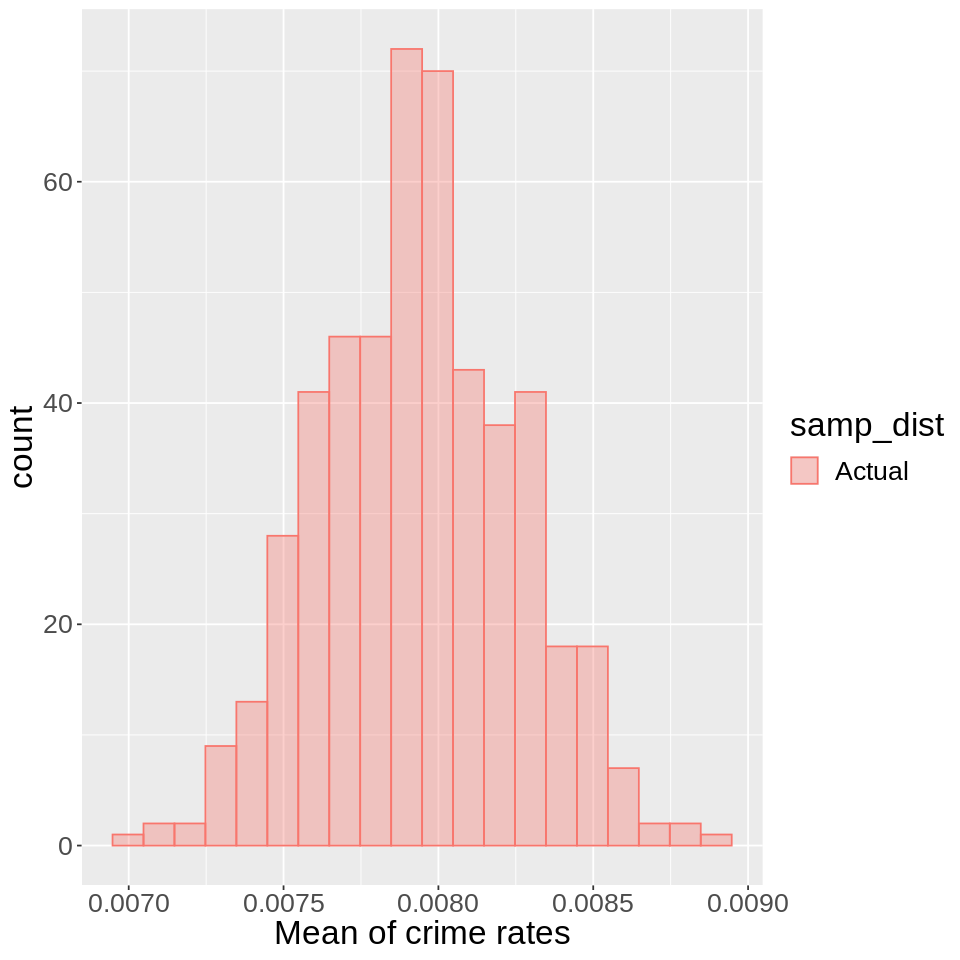

In [153]:
# Plotting bootstrap distribution
bootstrap_500_plot <- sampling_dist %>% 
    ggplot() +
    geom_histogram(aes(stat, color = samp_dist, fill = samp_dist), alpha=.35, bins=20) +
    theme(text = element_text(size=20)) + 
    xlab("Mean of crime rates")
bootstrap_500_plot

In [154]:
head(one_sample)

replicate,DAY,MONTH,count_crimes,total_num,rate
<int>,<int>,<int>,<int>,<fct>,<dbl>
1,10,9,17,1669,0.010185740
1,19,11,6,1669,0.003594967
1,13,4,19,1914,0.009926855
1,26,2,8,1914,0.004179728
1,10,11,20,1669,0.011983223
1,15,10,14,1669,0.008388256


### Hypothesis Testing


In [172]:
# Generating the Null model
set.seed(1234)
null_model_infer <- one_sample %>%
    specify(formula = rate ~ total_num) %>%
    hypothesise(null = "independence", mu = 0.00823045267489712) %>%
    generate(reps = 500, type = "permute") %>%
    calculate(stat = "diff in means", order = c("1914", "1669"))

head(null_model_infer)

Warning message:
“Parameter values are not specified when testing that two variables are independent.”


replicate,stat
<int>,<dbl>
1,0.0002458896
2,0.0005679600
3,0.0001147059
4,-0.0007186459
5,0.0005646084
6,-0.0014028341


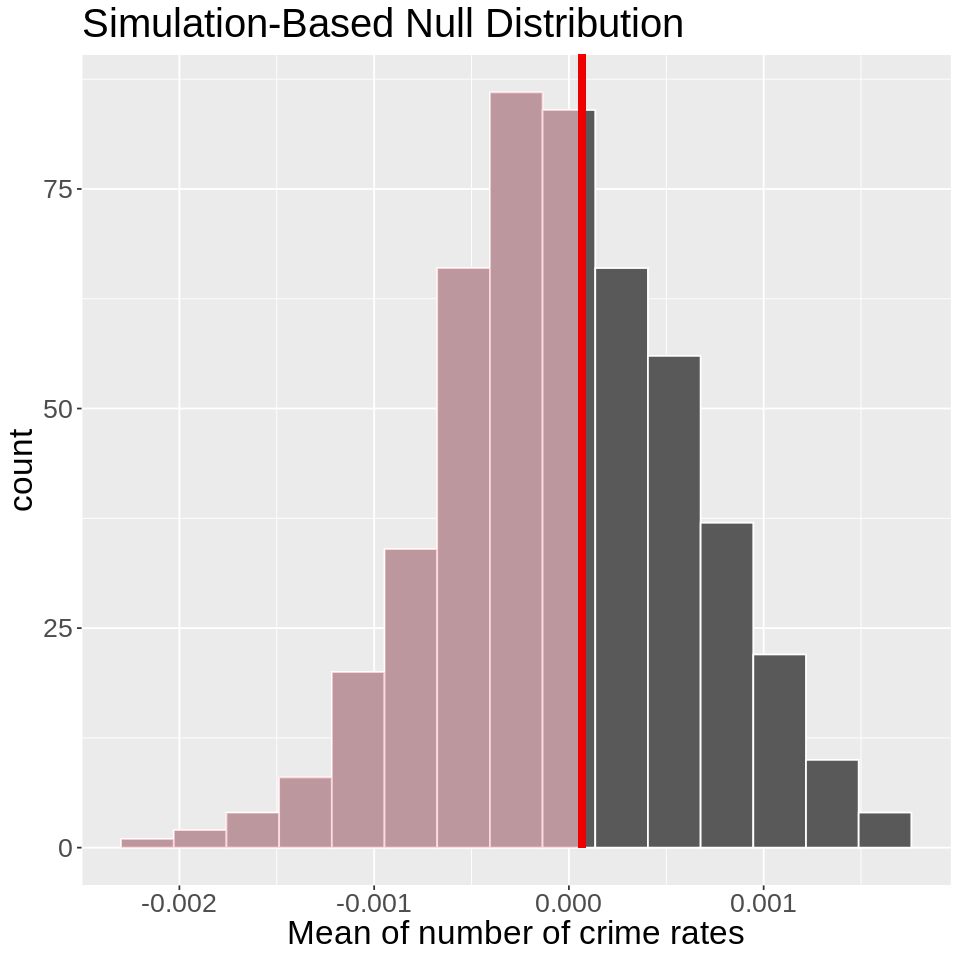

In [173]:
diff_in_pop_mean <- pop_mu_term_2 - pop_mu_term_1
null_model_vis_infer <- null_model_infer %>% 
    visualize() + 
    shade_p_value(obs_stat = diff_in_pop_mean, direction = "left") +
    xlab("Mean of number of crime rates") + 
    theme(text = element_text(size = 20))

null_model_vis_infer

In [174]:
# Getting the p-value
p_value_infer <- null_model_infer %>% 
    get_p_value(obs_stat = diff_in_pop_mean, direction = "left")
p_value_infer

p_value
<dbl>
0.562
